In [1]:
from IPython.display import clear_output
from codeUtils import *
import matplotlib.pyplot as plt
import tensorflow as tf
# data = np.transpose(get_data(1)[1][0,:,:,:,0], (2,0,1))
a = np.load('y_pred_p.npz')['arr_0']
b = np.load('y_true.npz')['arr_0'][...,0]
c = np.load('y_pred_cce.npz')['arr_0']
# a, b = get_data(1, dims='2D')

# a = a[2,0,:,:,:,:]
# b = b[0,:,:,:,0]
# a = np.transpose(a, (2,0,1,3))
# b = np.transpose(b, (2,0,1))
print(a.shape)
print(b.shape)

(80, 144, 144, 5)
(80, 144, 144)


In [11]:
# import ants
# b = ants.image_read('../pp/Train/brats_2013_pat0001_1_HGG/brats_2013_pat0001_1_HGG_seg.nii').numpy()
# _, a = get_input_data(dims='2D')
def dice_coef(y_true, y_pred):

    smooth = 1e-6 # check the correct value
    y_pred_1 = y_pred
    y_true_1 = tf.one_hot(tf.cast(y_true[...,0], tf.int64), depth=5, axis=-1)
    print(y_true.shape, y_true_1.shape)
    num = K.sum(y_true_1 * y_pred_1, axis=(0,1,2))
    den = K.sum(y_true_1, axis=(0,1,2)) + K.sum(y_pred_1, axis=(0,1,2))
    print(num, den)
    dice = K.mean((2. * num + smooth)/(den + smooth))
    print(dice)
    # print(y_pred_1.shape, y_true_1.shape)
    # print(np.histogram(y_pred_1), np.histogram(y_true_1))
    return dice
print(dice_coef(b[40:41],a[40:41]))


(1, 144, 144, 1) (1, 144, 144, 5)
tf.Tensor([19773.164       0.        375.53058     0.          0.     ], shape=(5,), dtype=float32) tf.Tensor([4.0040797e+04 2.0267947e+00 1.3037087e+03 1.2474648e+02 7.1980381e-01], shape=(5,), dtype=float32)
tf.Tensor(0.3127497, shape=(), dtype=float32)
tf.Tensor(0.3127497, shape=(), dtype=float32)


In [9]:
def display(imgs):
    i = 40
    n = len(imgs)
    while True:
        f, ax = plt.subplots(1,n)
        for j in range(n):
            ax[j].imshow(imgs[j][i], cmap='gray')
        ax[0].set_title('(a)')
        ax[1].set_title('(b)')
        ax[2].set_title('(c)')
        # f.text(0.5,0.8,f'depth={i}',ha='center',size=18)
        plt.show()
        zz = input('give me:')
        if zz.isnumeric():
            i = max(0, min(int(zz), 79))
        elif zz == 'a':
            i = (i-5)%80
        elif zz == 's':
            i = (i-1)%80
        elif zz == 'd':
            i = (i+1)%80
        elif zz == 'f':
            i = (i+5)%80
        else:
            break
        clear_output(wait=True)

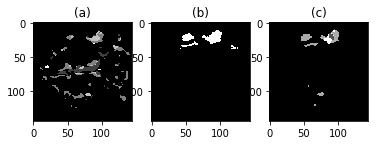

In [10]:
A = tf.argmax(a,axis=-1)
C = tf.argmax(c,axis=-1)
print(A.shape)
print(b.shape)
display([A, b, C])

In [8]:
print(np.histogram(A))
# tf.keras.losses.SparseCategoricalCrossentropy()(b,a)
#  sparse_categorical_crossentropy(b,a)
# print(np.sum(b==0))


(array([      0,       0,       0,       0,       0, 1658880,       0,
             0,       0,       0]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]))


In [3]:
np.sum(a==0)
print(np.histogram(A))
print(np.histogram(b))
# a=np.random.random((80, 144, 144)).astype('float32')
# soft_dice_loss(a,b)

NameError: name 'A' is not defined

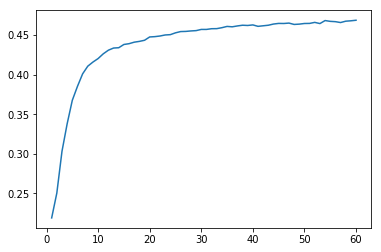

In [28]:
import re
loss = []
with open('output3.txt', 'r') as f:
    for line in f.readlines():
        if line[:9] == '3946/3946':
            z = float(re.findall(f'[0-9]+\.[0-9]+', line)[2])
            loss.append(z)
import matplotlib.pyplot as plt
plt.plot(range(1,61), loss, '-')
